<a href="https://colab.research.google.com/github/nishigandha2/House_prediction_model/blob/main/Copy_of_House_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color="orange">Problem statement:**
The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

In [ ]:
# Importing all the required library here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pylab
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load The Data

In [ ]:
#creating directory path
dir_path='/content/drive/My Drive/Dataset'

In [ ]:
#read dataset and naming it as airbnb data frame
df=pd.read_excel("/content/drive/MyDrive/Dataset/DS - Assignment Part 1 data set.xlsx" )

In [ ]:
#check the index in columns
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [ ]:
#check the head
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
df.tail(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [ ]:
df.sample(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
64,2013.333333,17.5,995.7554,0,24.96305,121.54915,2,862,25.3
374,2013.250000,5.4,390.5684,5,24.97937,121.54245,3,1057,49.5
304,2013.416667,20.0,1626.0830,3,24.96622,121.51668,3,970,29.4
54,2013.083333,16.1,289.3248,5,24.98203,121.54348,2,1193,51.7
127,2013.250000,3.8,383.8624,5,24.98085,121.54391,2,1136,55.0


# <font color="orange"> **Points to note:**

1.df.head() shows top of the data.

2.df.tail() shows bottom of the data.

3.It's better practice to not relay on head and tail only, it will give some    biased understanding about data.

4.so we should use df.sample(), it randomly picks the observations from the data, it will give us reliable information about data.

 Randomness is an important statistical property of data.

In [ ]:
df.shape

(414, 9)

There are 414 rows with 9 columns

In [ ]:
#check the information about data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
#checking for null values
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# **<font color="orange">There is no null values**

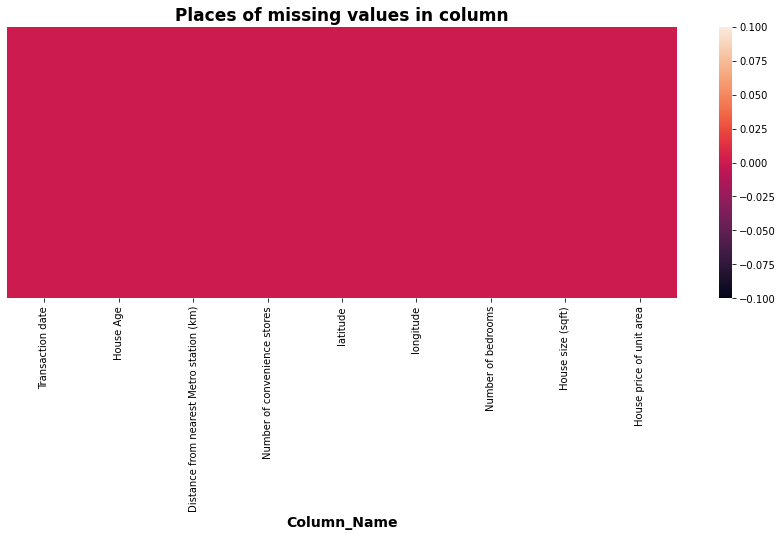

In [ ]:
#checking for missing values
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# **<font color="orange">No missing Values in our dataset**

In [ ]:
#Checking for duplicate data

duplicate_data = df.duplicated()
print(duplicate_data.sum())
df[duplicate_data]

0


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area


#<font color="orange"> **Looks like there's no duplicate data present!**

In [ ]:
#Rename the Columns
column_dict = {'Transaction date':'Transaction_date', 'House Age':'House_Age', 'Distance from nearest Metro station (km)':'Distance_from_nearest_Metro_station_(km)', 'Number of convenience stores':'Number_of_convenience_stores', 'latitude':'Latitude','longitude':'Longitude','Number of bedrooms':'Number_of_bedrooms', 'House size (sqft)':'House_size', 'House price of unit area':'House_price_of_unit_area'} 

In [ ]:
df.rename(columns= column_dict, inplace=True)

In [ ]:
#check the head
df.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_(km),Number_of_convenience_stores,Latitude,Longitude,Number_of_bedrooms,House_size,House_price_of_unit_area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
# Appropriate formatting of appliances values
df['Transaction_date']=df['Transaction_date'].apply(lambda x:"{0:1.0f}".format(x))

In [ ]:
df.head(5)

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_(km),Number_of_convenience_stores,Latitude,Longitude,Number_of_bedrooms,House_size,House_price_of_unit_area
0,2013,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2013,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2014,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2014,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2013,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
#lets describe the price
df['House_price_of_unit_area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House_price_of_unit_area, dtype: float64

# <font color="orange"> **Points to note here**
Here we will using pandas describe method, which is explicitly designed for numerical quantities, we here we will analyzing numerical features/variables/attributes/columns.

Even though we can include categorical features into describe method, but there is no valid reason to analyze categorical feature through the window of continuous variable

# **<font color="orange">Skewness value**

which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [ ]:
# Descriptive Statistics
round(df.describe(),1)

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_(km),Number_of_convenience_stores,Latitude,Longitude,Number_of_bedrooms,House_size,House_price_of_unit_area
count,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0,414.0
mean,0.0,17.7,1083.9,4.1,25.0,121.5,2.0,931.5,38.0
std,0.0,11.4,1262.1,2.9,0.0,0.0,0.8,348.9,13.6
min,0.0,0.0,23.4,0.0,24.9,121.5,1.0,402.0,7.6
25%,0.0,9.0,289.3,1.0,25.0,121.5,1.0,548.0,27.7
50%,0.0,16.1,492.2,4.0,25.0,121.5,2.0,975.0,38.4
75%,0.0,28.2,1454.3,6.0,25.0,121.5,3.0,1234.8,46.6
max,0.0,43.8,6488.0,10.0,25.0,121.6,3.0,1500.0,117.5


In [ ]:
numeric_features = df.describe().columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


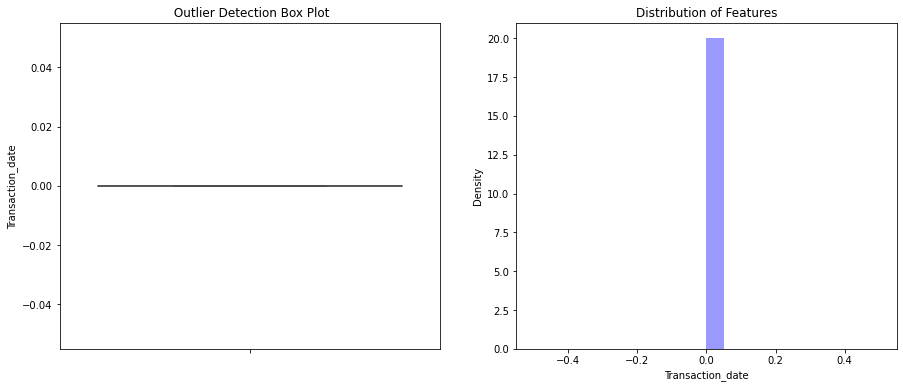

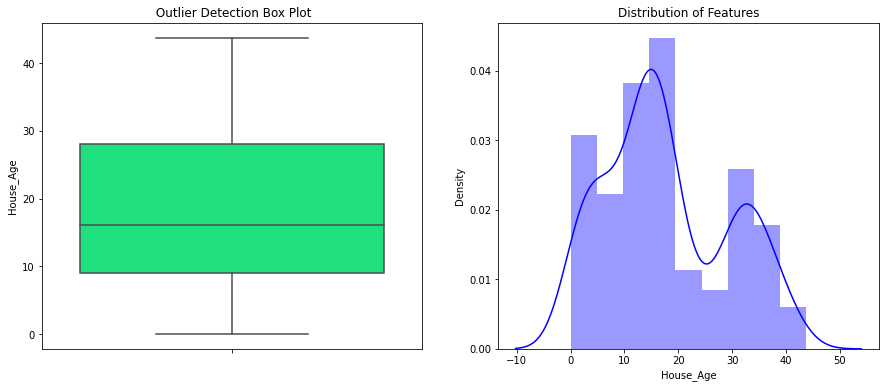

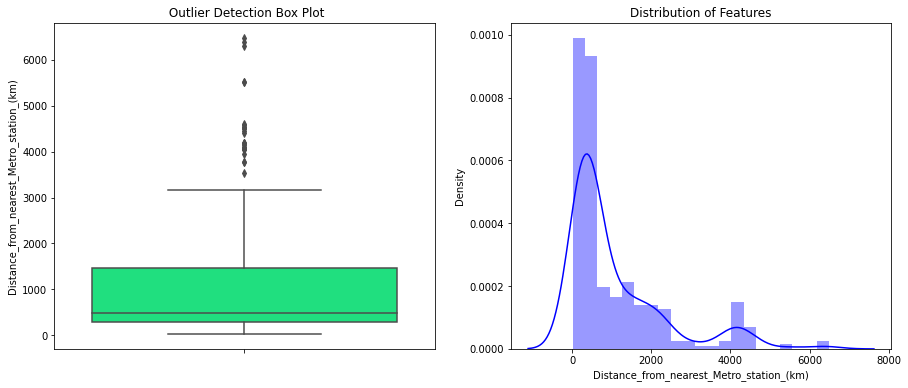

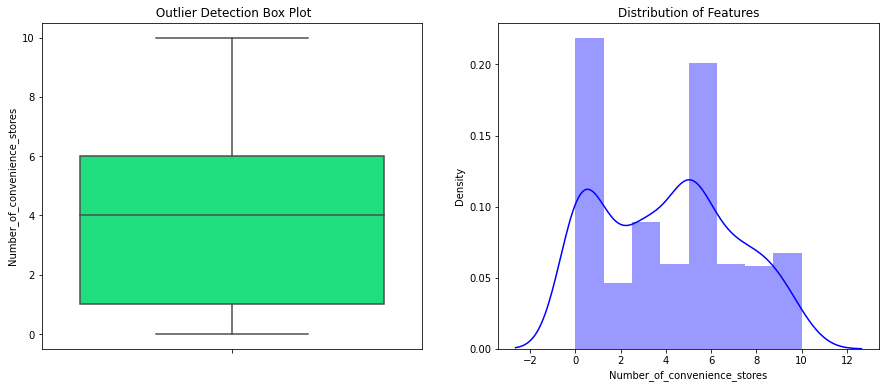

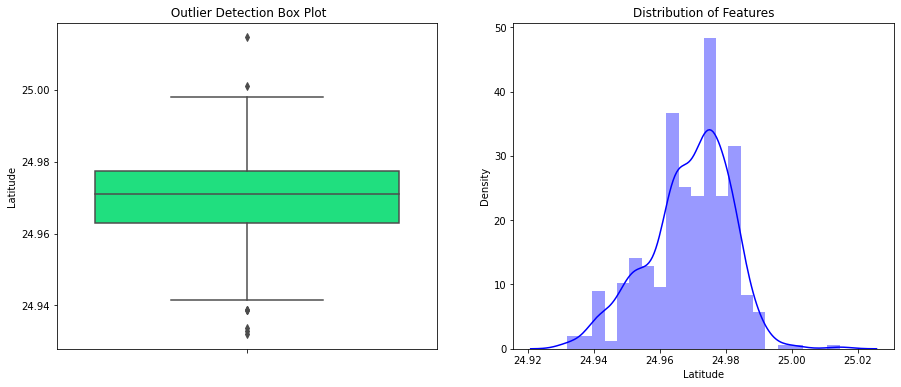

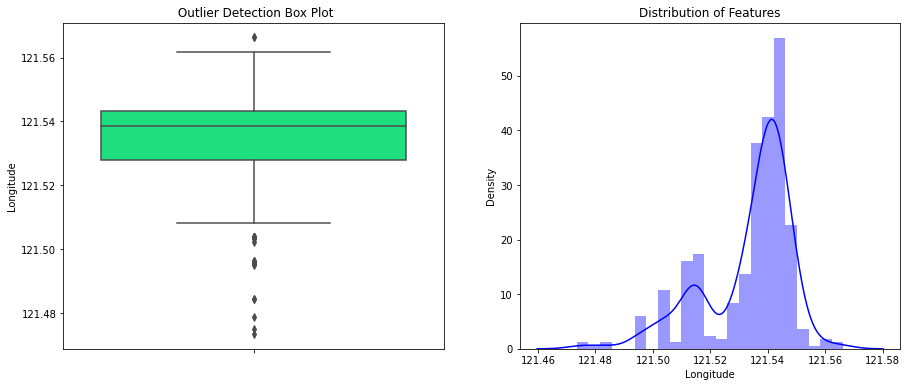

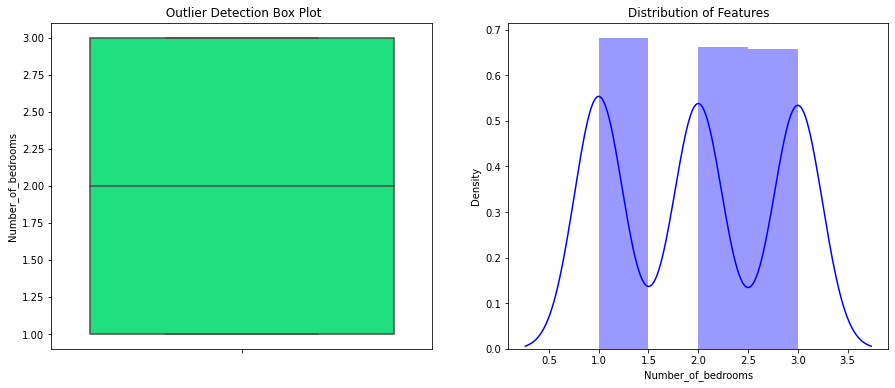

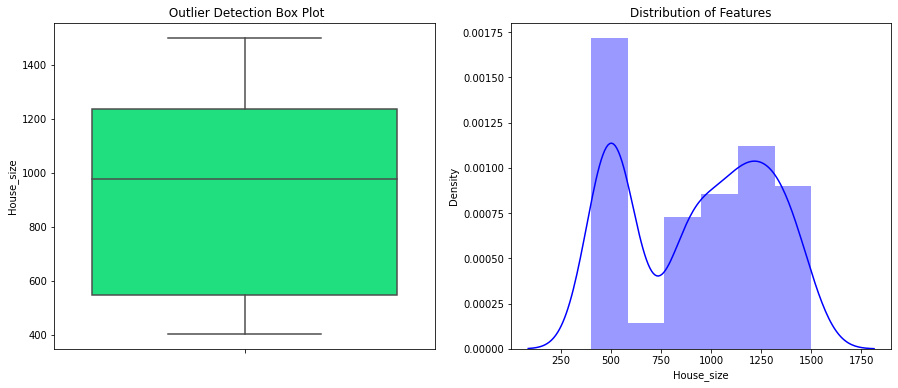

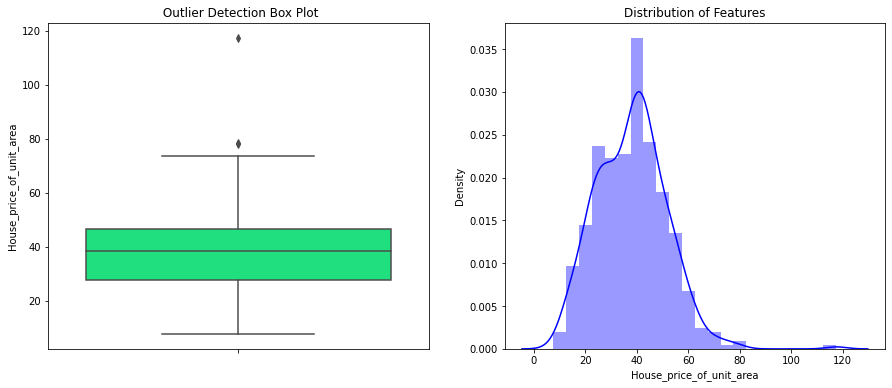

In [ ]:
# Plotting the distribution of the numerical features
for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var], color='#00FF7F')
    fig.set_title(' Outlier Detection Box Plot')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color='blue')
    fig.set_title("Distribution of Features")
    fig.set_xlabel(var)
    plt.show()

**There are many outloers in latitude column so we will try to remove those**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


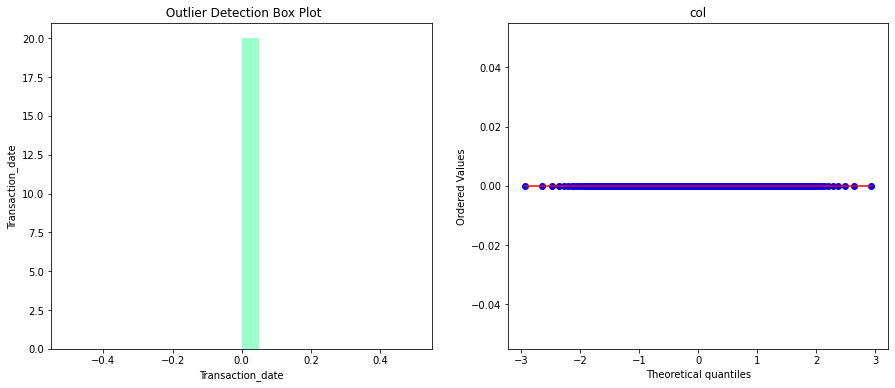

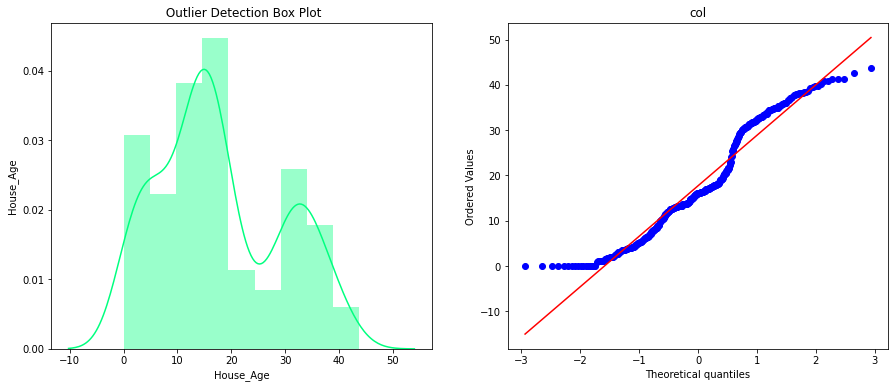

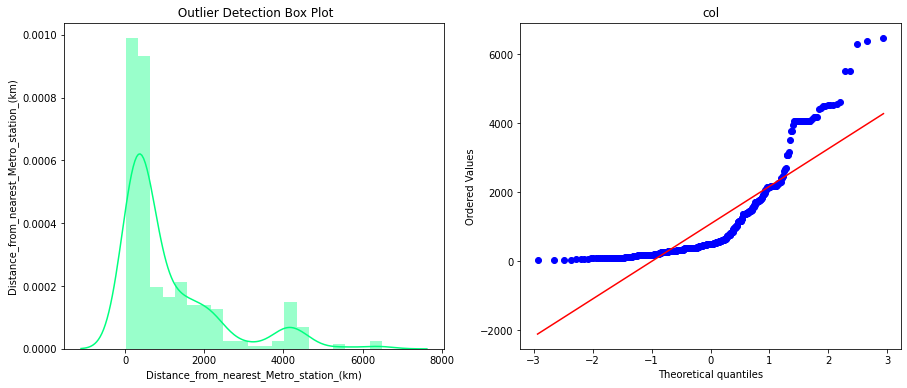

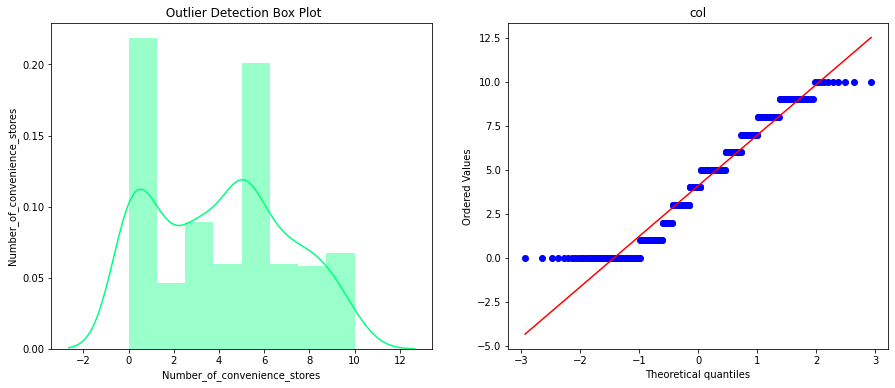

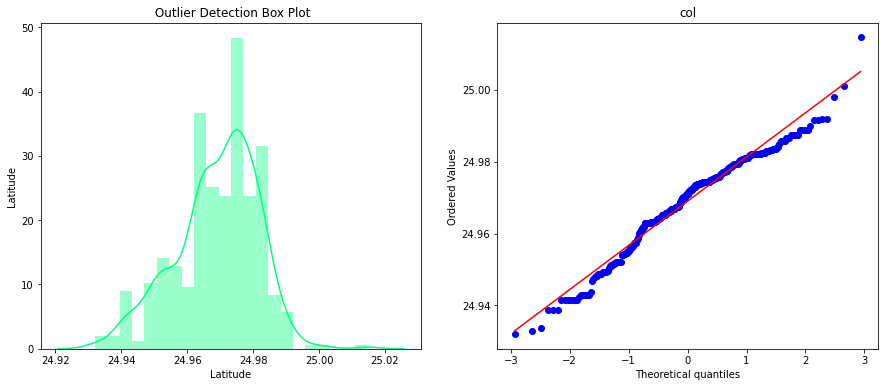

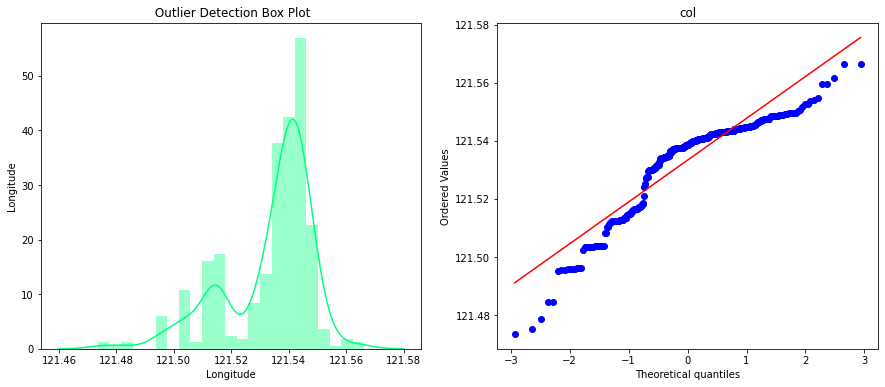

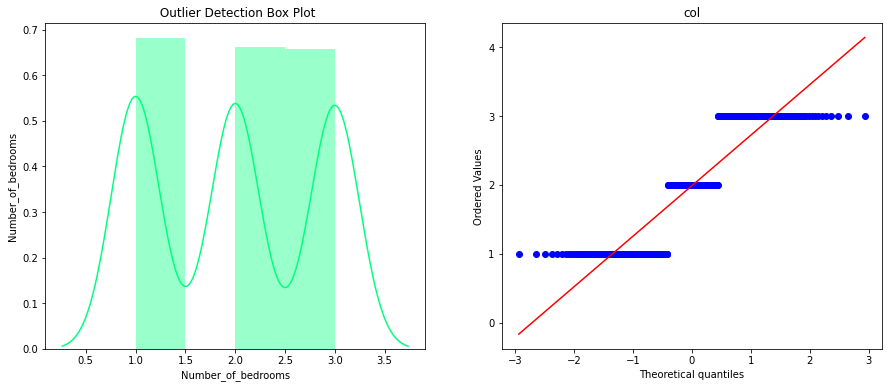

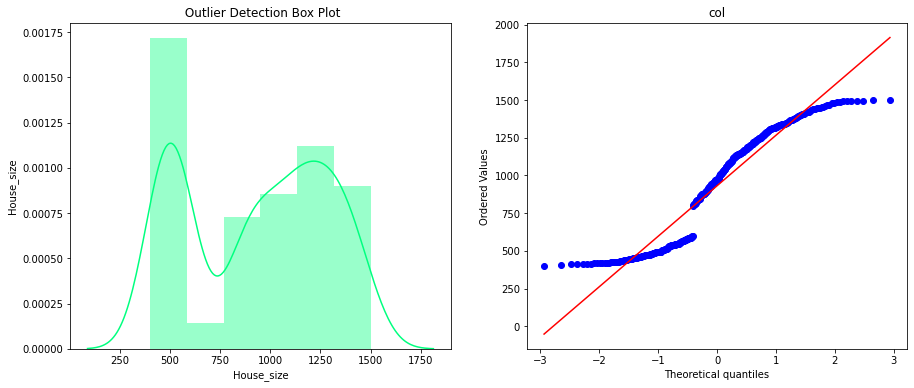

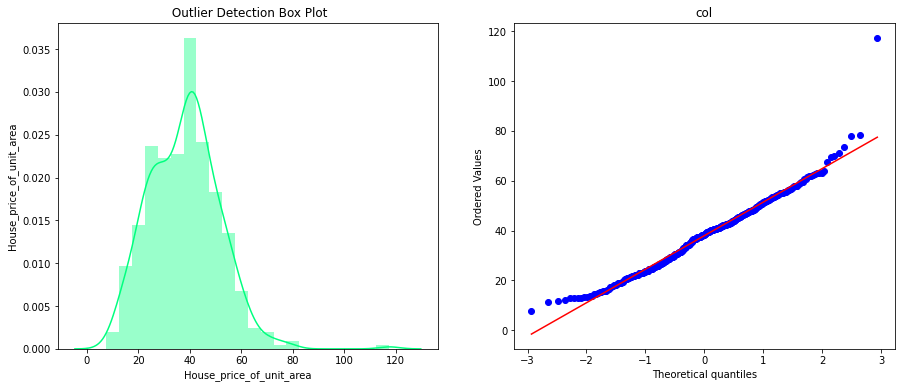

In [ ]:
# QQ-Plot
for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var], color='#00FF7F')
    fig.set_title(' Outlier Detection Box Plot')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist='norm', plot=plt, fit=True)
    plt.title("col")
    plt.show()

In [ ]:
print(df['Longitude'].skew())

-1.2195914979891498


In [ ]:
print(df['Longitude'].quantile(0.05))
print(df['Longitude'].quantile(0.95))

121.50342
121.5490525


**The skewness value should be between -1 and +1.we will try to make it in range**





In [ ]:
df['Longitude'] = np.where(df['Longitude'] <121.50342, 121.50342,df['Longitude'])
df['Longitude'] = np.where(df['Longitude'] >121.5490525, 121.5490525,df['Longitude'])
print(df['Longitude'].skew())

-1.012026148617761


# <font color="orange"> **Points to note here**

A Q-Q plot is a graphic method for testing whether a dataset follows a given distribution, but it may also be used to determine outliers.

The expected values are not following the reference line, indicating the data was not normally distributed, the data points away from the reference lines are suspected outliers

Here some data is having outliers and not normally distributed .We  try to remove outliers 

In [ ]:
for var in numeric_features:
    print(var, df[var].skew())

Transaction_date 0
House_Age 0.38292623077299737
Distance_from_nearest_Metro_station_(km) 1.8887565801256048
Number_of_convenience_stores 0.15460656758377123
Latitude -0.4385984450390504
Longitude -1.012026148617761
Number_of_bedrooms 0.022309017612164857
House_size -0.11362728091036625
House_price_of_unit_area 0.5998525842660576


In [ ]:
pd.DataFrame(df.skew().round(2))

,0
Transaction_date,0.00
House_Age,0.38
Distance_from_nearest_Metro_station_(km),1.89
Number_of_convenience_stores,0.15
Latitude,-0.44
Longitude,-1.01
Number_of_bedrooms,0.02
House_size,-0.11
House_price_of_unit_area,0.60


Now our Data is not that much skew .its skewness is within accetable range.so no need to worried about it :)

##<font color=orange>Visualizing the location of the houses based on latitude and longitude.
<font color=darkgreen>So according to the dataset , we have latitude and longitude on the dataset for each house. We are going to see the common location and how the houses are placed.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2100x1680 with 0 Axes>

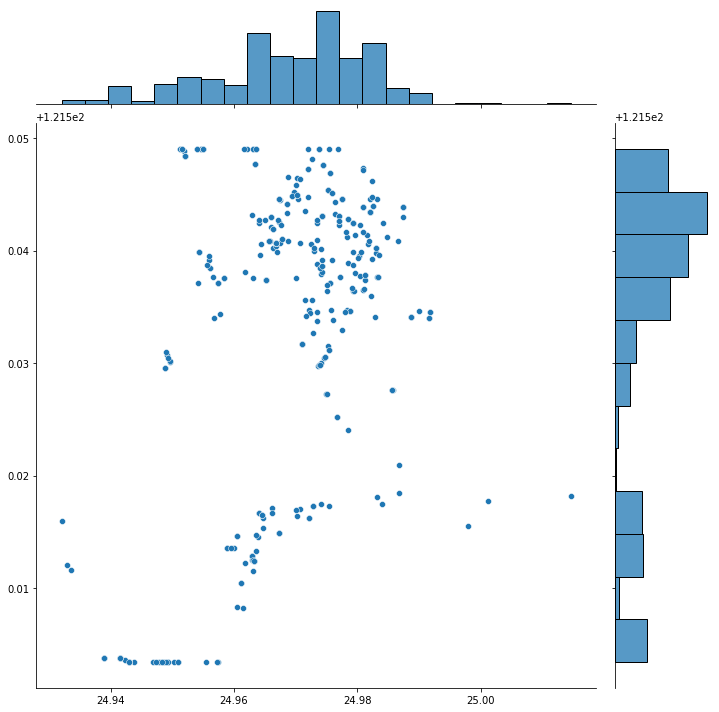

In [ ]:
plt.figure(figsize=(10,8), dpi = 210)
sns.jointplot(x=df.Latitude.values,y=df.Longitude.values,size=10)
plt.ylabel('Longitude',fontsize=20)
plt.xlabel('Latitude',fontsize=20)
plt.show()

**How common factors are affecting the price of the houses ?**

Text(0.5, 1.0, 'Price vs House size')

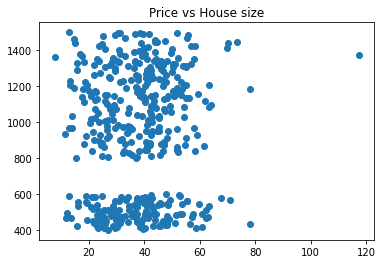

In [ ]:
plt.scatter(df.House_price_of_unit_area,df.House_size)
plt.title("Price vs House size")

Text(0.5, 1.0, 'Price vs longitude')

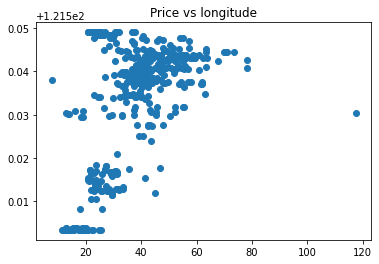

In [ ]:
plt.scatter(df.House_price_of_unit_area,df.Longitude)
plt.title("Price vs longitude")

Text(0.5, 1.0, 'Price vs Latitude')

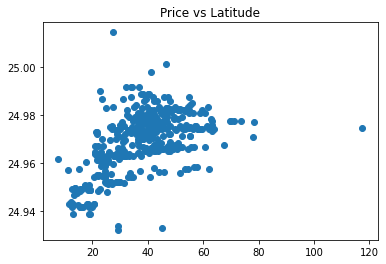

In [ ]:
plt.scatter(df.House_price_of_unit_area,df.Latitude)
plt.title("Price vs Latitude")

##<font color=orange>Linear Regression##

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()
from sklearn.metrics import r2_score

In [ ]:
y = (df['House_price_of_unit_area'])
x= df.drop(columns = ['House_price_of_unit_area'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
print(x_train.shape)
print(x_test.shape)

(310, 8)
(104, 8)


In [ ]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.5854924852504779

In [ ]:
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 77.73049625497188
RMSE= 8.816490018991225
R2_Score= 0.5854924852504779


In [ ]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 85.86460006839226
RMSE= 9.266315344752318
R2_Score= 0.5047878405919876


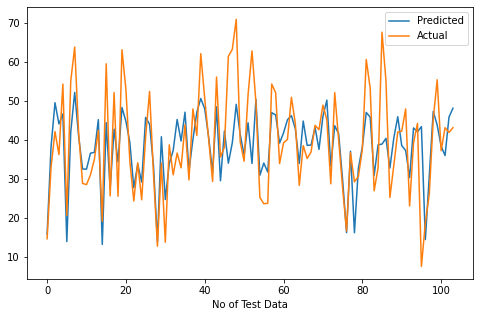

In [ ]:
#Plot the figure
plt.figure(figsize=(8,5))
plt.plot(pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##<font color=orange>Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(x_train, y_train)

0.5854910732097955

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5047452883182139

In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')


MSE= 77.73049625497188
RMSE= 8.816490018991225
R2_Score= 0.5854924852504779


In [ ]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 85.86460006839226
RMSE= 9.266315344752318
R2_Score= 0.5047878405919876


In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+04, tolerance: 4.797e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.720e+03, tolerance: 4.597e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -82.82664502964343


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)
y_pred_lasso_train = lasso_regressor.predict(x_train)
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 85.95933568671627
RMSE : 9.271425763425832
R2 : 0.5042414660664472
Adjusted R2 :  0.4624933789983585


In [ ]:
SE  = mean_squared_error(y_train, y_pred_lasso_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_lasso_train)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_train, y_pred_lasso_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 85.95933568671627
RMSE : 9.271425763425832
R2 : 0.5853512816384324
Adjusted R2 :  0.5504334948290373


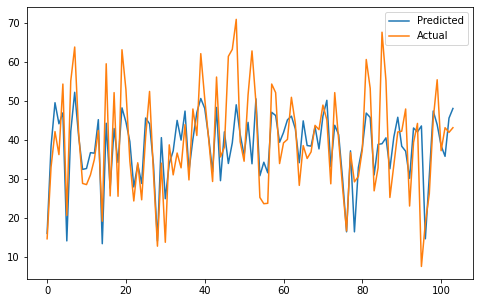

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

##<font color=orange>Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73273e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.99588e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.5412e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.73273e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -82.75224958186332


In [ ]:
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge_train = ridge_regressor.predict(x_train)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 85.99351421494875
RMSE : 9.27326879880815
R2 : 0.5040443461502313
Adjusted R2 :  0.46227965951025074


In [ ]:
MSE  = mean_squared_error(y_train, y_pred_ridge_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred_ridge_train)
r2

MSE : 77.73597785233298
RMSE : 8.81680088537407


0.5854632539524871

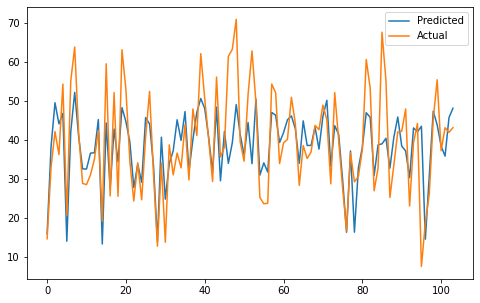

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

##<font color=orange>Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(x_train,y_train)
ElasticNet(alpha=0.1)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(x_train, y_train)

0.560255277329321

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 94.30143966293141
RMSE : 9.710892835518854
R2 : 0.45612953960574987
Adjusted R2 :  0.4103299218883393


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+04, tolerance: 4.797e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.730e+03, tolerance: 4.597e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using  {'alpha': 0.0001, 'l1_ratio': 0.8}  the negative mean squared error is:  -82.65191650202298


In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)
pred_train = elastic_regressor.predict(x_train)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 86.68942858735302
RMSE : 9.310715793501219
R2 : 0.5000307566285087
Adjusted R2 :  0.45792808350248837


In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 77.88809166038837
RMSE= 8.825423030109569
R2_Score= 0.5846520881993533


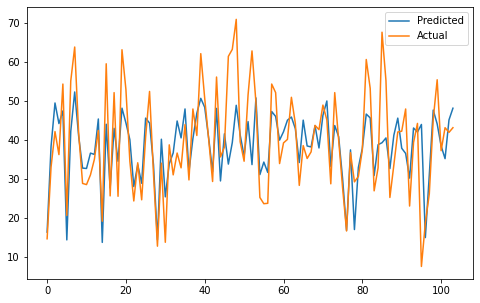

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

##**<font color=orange>Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=tree.predict(x_test)
pred_train = tree.predict(x_train)
r2_score(y_train, pred_train)

1.0

In [ ]:
r2_score(y_test, y_pred)

0.4923585344051782

In [ ]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

Adjusted R2 :  0.4496097794077195


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 88.01971153846154
RMSE : 9.381882089349745


In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 0.0
RMSE= 0.0
R2_Score= 1.0


Text(0, 0.5, 'Predicted')

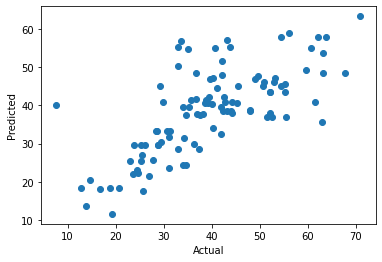

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

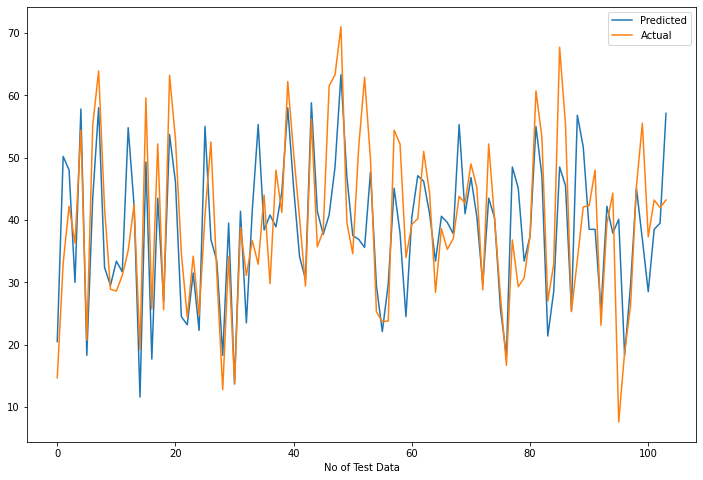

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
tree.feature_importances_

array([0.        , 0.14511183, 0.57118859, 0.03748298, 0.10131557,
       0.10718061, 0.00314   , 0.03458042])

##**<font color="orange">Random Forest Regressor**

In [ ]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=5)
#training the model
rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=5)

In [ ]:
#defining the predicted variables
pred_train = rf_reg.predict(x_train)
pred_test = rf_reg.predict(x_test)

In [ ]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 8.201702881451675
RMSE= 2.863861533219034
R2_Score= 0.9562634018577094


In [ ]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 53.95738262923073
RMSE= 7.345568911202911
R2_Score= 0.6888082871574244


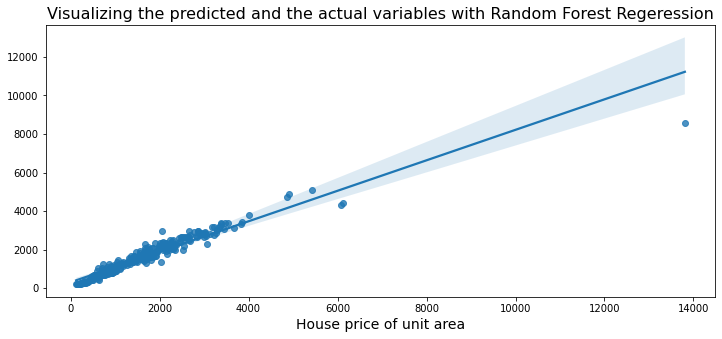

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_train*y_train, pred_train*pred_train)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('House price of unit area', size=14)
plt.show()

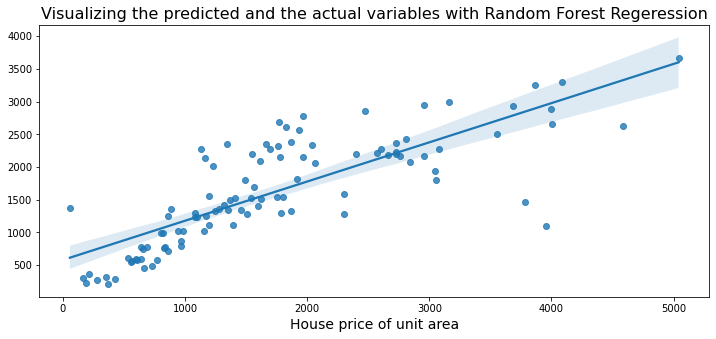

In [ ]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot(y_test*y_test, pred_test*pred_test)
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('House price of unit area', size=14)
plt.show()

##**<font color=orange>XG Boost**



In [ ]:
import xgboost as xgb

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
train_score = reg.score(x_train, y_train)
test_score = reg.score(x_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2

Train score: 0.5749556127740725
Test score: 0.5406863139220636


0.5406863139220636

In [ ]:
r2

0.5406863139220636

In [ ]:
adj_r2

0.5119792085421926

In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 73.67400138810058
RMSE : 8.583356067885136


##<font color=orange>Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train_df, x_test_df = pd.DataFrame(x_train), pd.DataFrame(x_test)
poly = PolynomialFeatures(degree = 2)
x_train_poly, x_test_poly = poly.fit_transform(x_train_df), poly.fit_transform(x_test_df)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from numpy import math

regressor = LinearRegression()
model = regressor.fit(x_train_poly, y_train)
# Predicting the Test set results
y_pred = regressor.predict(x_test_poly)
y_pred_train = regressor.predict(x_train_poly)
math.sqrt(mean_squared_error(y_test, y_pred))

7.861316884397607

In [ ]:
r2_score(y_test, y_pred)

0.6442103952215219

In [ ]:
coefficient = model.coef_
intercept = model.intercept_
print(coefficient)
print(intercept)

[ 2.61812844e+02  6.42540608e+00  1.00164161e+03  1.78535954e+01
  1.85046436e+03 -1.09863648e+05  1.01961344e+06 -2.40542160e+04
  5.65907641e+01 -1.28028788e-02 -1.70515307e-02 -7.29522732e-03
  1.53594977e-03  4.46879332e-03  1.29927311e-04  1.42944332e-03
 -4.98825573e-04  1.86276820e-02  4.95944297e-05  3.50363412e-03
 -6.52426079e+00 -6.90847876e+00 -4.38276790e-03 -1.38835337e-04
 -9.95069994e-07 -9.63171817e-04 -2.86759933e-01 -8.80077074e-02
  3.69584597e-03 -7.65315536e-06  1.57256572e-02 -1.33911672e+02
  1.23059179e+01  8.16265549e-01 -2.96696859e-03  5.03529039e+03
 -1.15663618e+03  3.79977400e+01  1.20663658e-01 -4.07460081e+03
  1.90026666e+02 -4.90345035e-01  7.62017738e-01  1.88392886e-03
  4.12074734e-06]
-60620133.64413638


In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 61.8003031569149
RMSE : 7.861316884397607


In [ ]:
MSE  = mean_squared_error(y_train, y_pred_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 55.40431728087492
RMSE : 7.443407639037037


In [ ]:
r2_score(y_train, y_pred_train)

0.7044238016695203

##<font color=orange>Cat Boost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 115 kB/s 


In [ ]:
from catboost import CatBoostRegressor
import timeit

from sklearn.datasets import make_regression
model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )

In [ ]:
model.fit(
      x_train, y_train,
      eval_set=(x_test, y_test),
      verbose=10); 

0:	learn: 13.4589943	test: 12.9483451	best: 12.9483451 (0)	total: 51.7ms	remaining: 5.11s
10:	learn: 11.5822755	test: 11.0852876	best: 11.0852876 (10)	total: 66.8ms	remaining: 540ms
20:	learn: 10.2338748	test: 9.8178335	best: 9.8178335 (20)	total: 92ms	remaining: 346ms
30:	learn: 9.2101270	test: 8.8658857	best: 8.8658857 (30)	total: 107ms	remaining: 239ms
40:	learn: 8.4124181	test: 8.1424476	best: 8.1424476 (40)	total: 126ms	remaining: 181ms
50:	learn: 7.8574928	test: 7.6578395	best: 7.6578395 (50)	total: 141ms	remaining: 135ms
60:	learn: 7.4209404	test: 7.3231233	best: 7.3231233 (60)	total: 167ms	remaining: 107ms
70:	learn: 7.0322271	test: 7.0485145	best: 7.0485145 (70)	total: 196ms	remaining: 80.2ms
80:	learn: 6.7556575	test: 6.8718607	best: 6.8718607 (80)	total: 210ms	remaining: 49.4ms
90:	learn: 6.5001758	test: 6.7808237	best: 6.7808237 (90)	total: 226ms	remaining: 22.4ms
99:	learn: 6.3009683	test: 6.7191064	best: 6.7191064 (99)	total: 251ms	remaining: 0us

bestTest = 6.719106377
b

In [ ]:
def train_on_cpu():  
  model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )
  
  model.fit(
      x_train, y_train,
      eval_set=(x_test, y_test),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))

0:	learn: 13.4589943	test: 12.9483451	best: 12.9483451 (0)	total: 2.54ms	remaining: 251ms
10:	learn: 11.5822755	test: 11.0852876	best: 11.0852876 (10)	total: 18.4ms	remaining: 149ms
20:	learn: 10.2338748	test: 9.8178335	best: 9.8178335 (20)	total: 34.1ms	remaining: 128ms
30:	learn: 9.2101270	test: 8.8658857	best: 8.8658857 (30)	total: 49.2ms	remaining: 110ms
40:	learn: 8.4124181	test: 8.1424476	best: 8.1424476 (40)	total: 76.1ms	remaining: 110ms
50:	learn: 7.8574928	test: 7.6578395	best: 7.6578395 (50)	total: 94.1ms	remaining: 90.5ms
60:	learn: 7.4209404	test: 7.3231233	best: 7.3231233 (60)	total: 118ms	remaining: 75.3ms
70:	learn: 7.0322271	test: 7.0485145	best: 7.0485145 (70)	total: 135ms	remaining: 55ms
80:	learn: 6.7556575	test: 6.8718607	best: 6.8718607 (80)	total: 149ms	remaining: 35ms
90:	learn: 6.5001758	test: 6.7808237	best: 6.7808237 (90)	total: 164ms	remaining: 16.3ms
99:	learn: 6.3009683	test: 6.7191064	best: 6.7191064 (99)	total: 177ms	remaining: 0us

bestTest = 6.71910637

In [ ]:
# Predicting the Test set results
y_pred = model.predict(x_test)
import math
math.sqrt(mean_squared_error(y_test, y_pred))

6.719106042036332

In [ ]:
r2_score(y_test, y_pred)

0.7400884135988505

In [ ]:
adj_r2

0.5119792085421926

In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 45.146386004129134
RMSE : 6.719106042036332


In [ ]:
# Validating Assumptions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
r2_score(y_train, y_train_pred)

0.7881929277792042

In [ ]:
from sklearn.metrics import mean_absolute_error
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred)

MSE is 39.70220301207538
RMSE is 6.300968418590541
RMSE is 0.7881929277792042
MAE is 4.319634994457885
MAPE is 13.321729851723454


In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 45.146386004129134
RMSE is 6.719106042036332
RMSE is 0.7400884135988505
MAE is 4.7125701050505935
MAPE is 14.591699048829318


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data scalling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
# Data scalling
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

In [ ]:
import sklearn
from sklearn import linear_model
import time

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# creating list of ML algorithms
models = [
           ['LinearRegression:',linear_model.LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           
           
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           
         ]

In [ ]:
# lets feed the data
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Model Name"] = name
    start = time.time()
    curr_model.fit(x_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(x_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(x_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(x_test)))
    model_data.append(curr_model_data)

[11:01:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# lets create result 
results_df = df = pd.DataFrame(model_data)

In [ ]:
# lets see result
results_df.round(3)

,Model Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.002,0.556,0.640,0.578
1,Lasso:,0.002,0.000,-0.000,0.963
2,Ridge:,0.001,0.556,0.640,0.578
3,RandomForest,0.250,0.957,0.690,0.536
4,ExtraTreeRegressor :,0.165,1.000,0.682,0.543
5,GradientBoostingRegressor:,0.086,0.935,0.689,0.537
6,XGBRegressor:,0.164,0.920,0.746,0.485


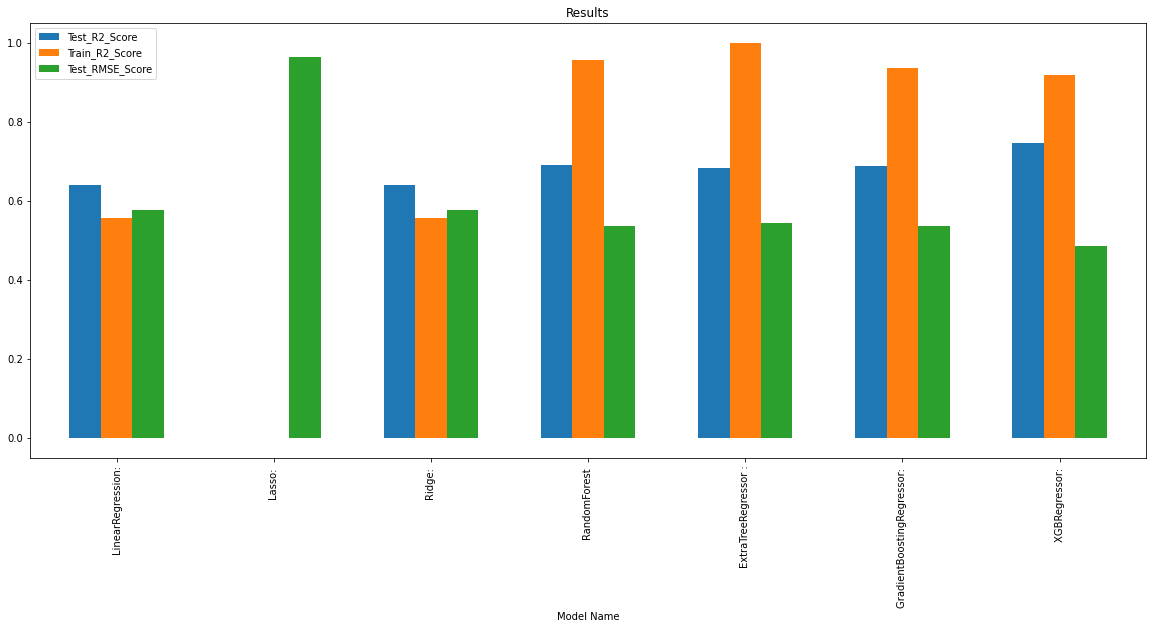

In [ ]:
# lets see result's bar plot
results_df.plot.bar(x="Model Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))
plt.show()

# <font color = "red"><u>**Observations**</u></font>
> * ### Most of the Algorithm are performing worst,we can go with XGBRegressor which gives more r2 and less error.
>> * ### We need more data, more relevant features.
>> * ### We will have to perform Feature Engineering
>>> * ### 1. Feature Transformation (Scaling of features, also checking for the normal distributuion
>>> * ### 2. Feature Construction (Constructing new relevant feature from existing features) 
>>> * ### 3. Feature Selection (we have PCA, LDA to perform this)
>>> * ### 4. Feature Extraction (We will have to calculate the feature importance of each feature before feeding to the algorithm, only important features will go into training)


---
# <FONT COLOR = "RED"><U>**CONCLUSION**</U></FONT>
---

* ### <FONT COLOR = "BLACK">**House price on unit area has highest positive correlation with latitude and longitude.**</FONT>
* ### <FONT COLOR = "green">**House price on unit area has highest positive correlation with size of house**</FONT>
* ### <FONT COLOR = "ORANGE">**Minimum house price per unit area is 7.6 and maximum 117.5**</FONT>
* ### <FONT COLOR = "BLUE">**Minimum house size is 402 and maximum 1500 sq.feet**</FONT>



# <u>**Future Work Scope**</u>
---
* ### It is completely possible to build a KPI(key performance indicator) using tableau or powerBI. Where we can have automated statistics about prediction of house price, given that we have large data.

